<a href="https://colab.research.google.com/github/rk119/F20DL-Group14-Submissions/blob/main/Part1_CW_Group14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursework 1 - Group 14

## Exploratory Data Analysis

**Objectives:**

*   Quantative Data Analysis: Statistical summary of the data
*   Random Samples: Vizualize random images from the dataset with their labels
*   Class-wise Samples: Vizualize random images from each class to understand class characteristics
*   Data Cleaning: Detect any outliers, missing values or duplicates
*   Class Distribution: Observe the frequency of images per class then check if the dataset is balanced or imbalanced
*   Pre-process the data if necessary
*   Pixel Intensity Distribution: Vizualize the pixel intensity values graphically overall and per class




### About the Dataset

The data set is subset the computer vision benchmark dataset  “German Street Sign Recognition Benchmark by Stallkamp et al” or GSTRB. This dataset consists of 10 classes and 9690 images. The images are in grey-scale with pixel values ranging from 0 to 255 and were rescaled to a common size of 48*48 pixels. Hence, each row (= feature vector) in the data set has 2305 features and represents a single image in row-vector format (2304 features) plus its associated class label.

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Loading the attributes and labels training datasets

Initializing the data path and obtaining the .csv files for training & testing

In [ ]:
# Complete data path for reusability
complete_data_path = "/content/drive/MyDrive/F20DL_Data/Traffic_Sign/CompleteDataSet/"

# X (Attributes) train file
x_train_all = pd.read_csv(complete_data_path + "x_train_all.csv")

# Y (Labels) train file
y_train_all = pd.read_csv(complete_data_path + "y_train_all.csv")


### Quantative Data Analysis

**Viewing the first 5 instances of the attributes training set**

In [ ]:
x_train_all.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


**Checking the number of rows and columns in the training datasets**

In [ ]:
print("X dataset shape {}".format(x_train_all.shape))
print("Y dataset shape {}".format(y_train_all.shape))

X dataset shape (9690, 2304)
Y dataset shape (9690, 1)


**Statistical summary of the attributes dataset**

**Note:** Transposed the summary for better readibility

The following metrics are used to describe the data:

*   *Count:* Shows the number of non-missing values for each feature
*   *Minimum and Maximum Values:* Shows the minimum and maximum values in each pixel
*   *Mean:* The average intensity value of the pixel
*   *Standard Deviation:* Shows how far the intensity values are spread out from the mean for that pixel/feature in the images
*   *25th, 50th and 75th Percentiles:* Give insights on the distribution of pixel intensities




In [ ]:
x_train_all.describe().T

,count,mean,std,min,25%,50%,75%,max
0,9690.0,89.658514,77.521341,5.0,32.0,57.0,126.00,255.0
1,9690.0,89.545201,77.430539,5.0,32.0,58.0,124.00,255.0
2,9690.0,89.343756,77.350452,4.0,32.0,57.0,122.75,255.0
3,9690.0,89.566770,77.498754,5.0,31.0,58.0,123.00,255.0
4,9690.0,89.812590,77.437292,5.0,32.0,58.0,125.00,255.0
...,...,...,...,...,...,...,...,...
2299,9690.0,68.878638,64.530366,4.0,25.0,44.0,84.00,255.0
2300,9690.0,68.294530,64.274550,4.0,25.0,44.0,82.00,255.0
2301,9690.0,67.831889,63.799350,5.0,25.0,43.0,82.00,255.0
2302,9690.0,67.548297,63.437102,4.0,25.0,43.0,81.00,255.0


### Image Visualization

**Displaying random images with their associated labels**

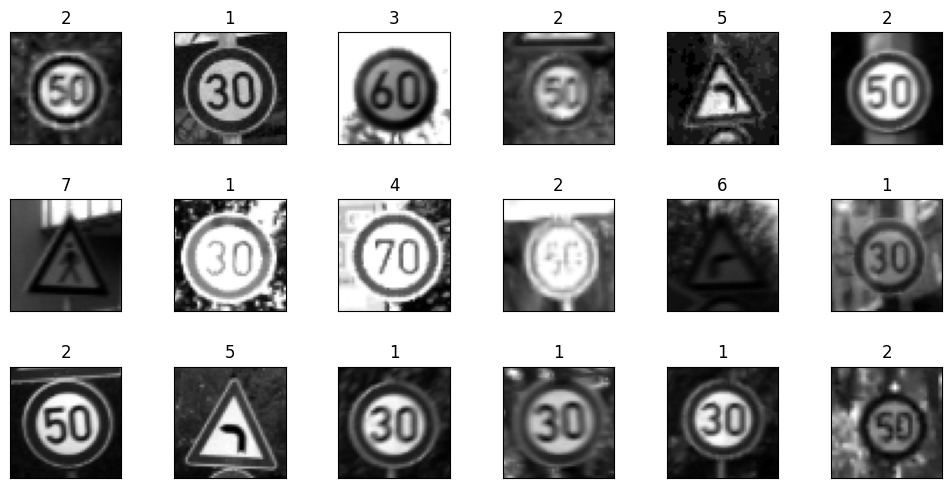

In [ ]:
def some_images(x, amount, random=True):
    # Setting the size of the figure to display the images
    plt.figure(figsize=(10, 10))

    for i in range(amount):
        if random == True:
            idx = np.random.randint(0, len(x)) # Selecting a random index
        else:
            idx = i
        plt.subplot(6, 6, i + 1)

        # Removing x and y ticks
        plt.xticks([])
        plt.yticks([])

        # Disabling the grid for a cleaner background
        plt.grid(False)

        # Displaying the images in grayscale
        plt.imshow(x.iloc[idx].values.reshape(48, 48), cmap='gray')

        # The corresponding label for the image
        label_index = int(y_train_all.iloc[idx, 0])
        plt.title(label_index)

    plt.tight_layout()

    # Adjusting the space between subplots for clarity.
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# Function call to generate/view 18 images from the dataset.
some_images(x_train_all, 18)


**Displaying random images per class with their associated labels**

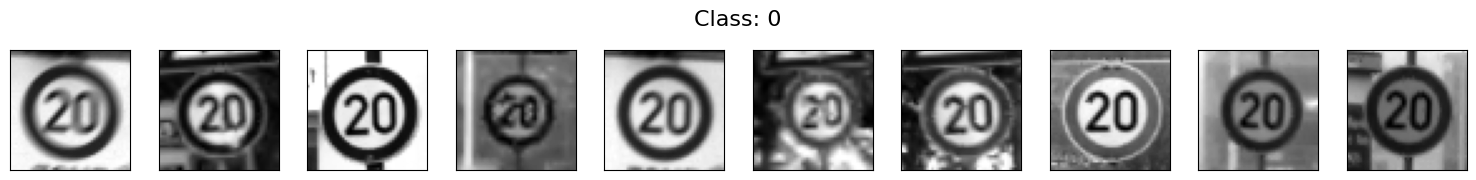

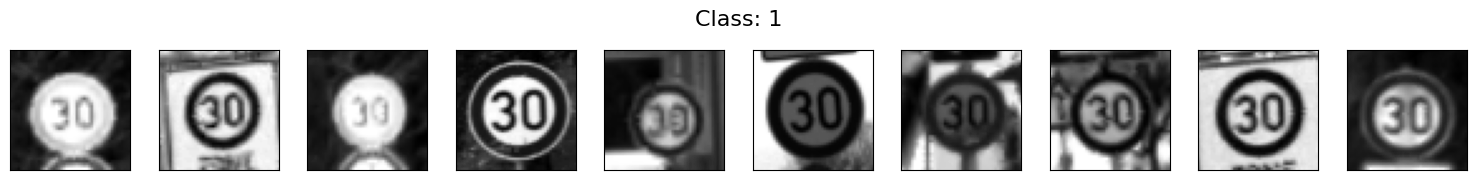

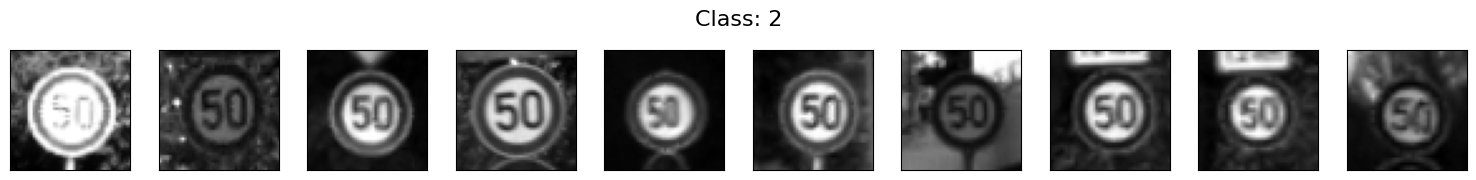

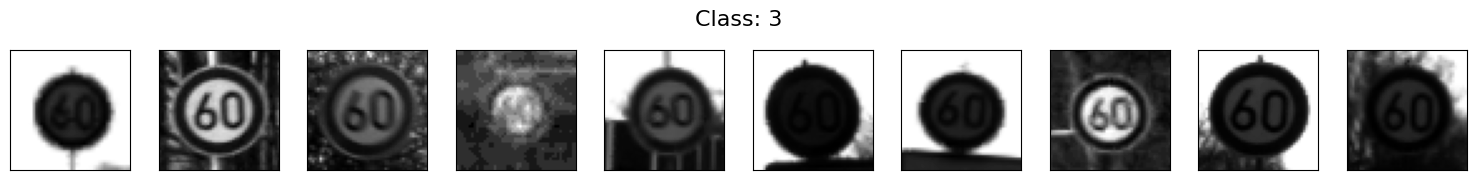

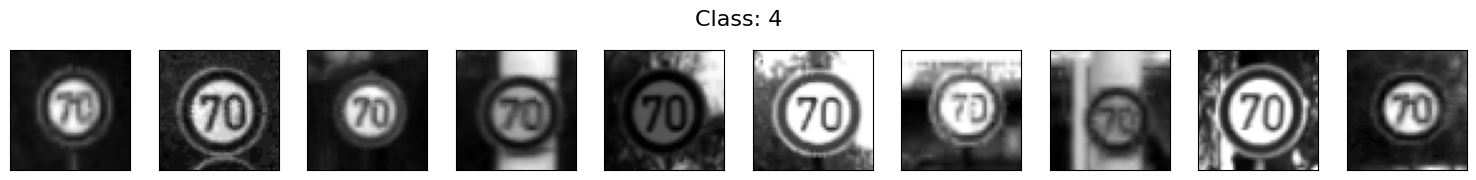

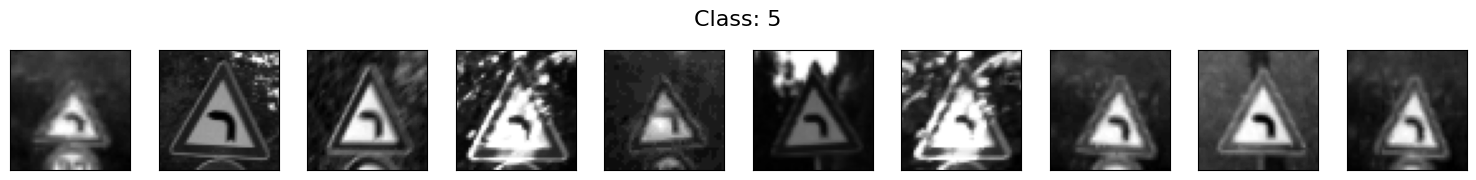

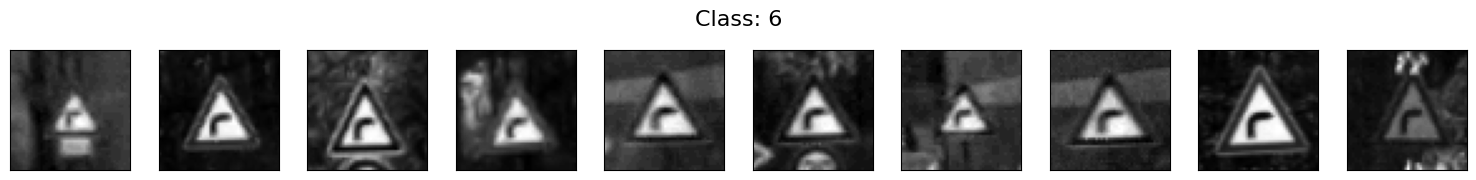

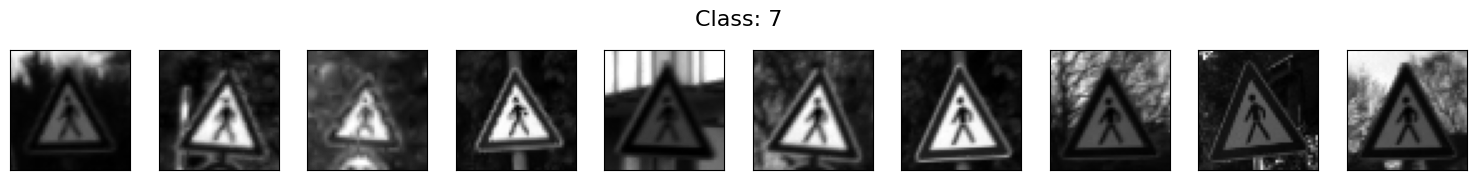

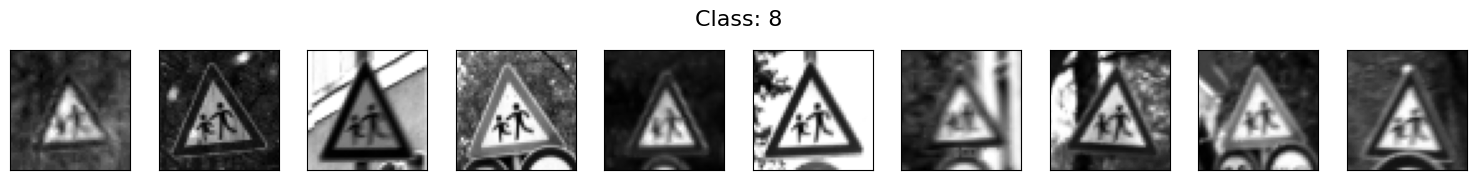

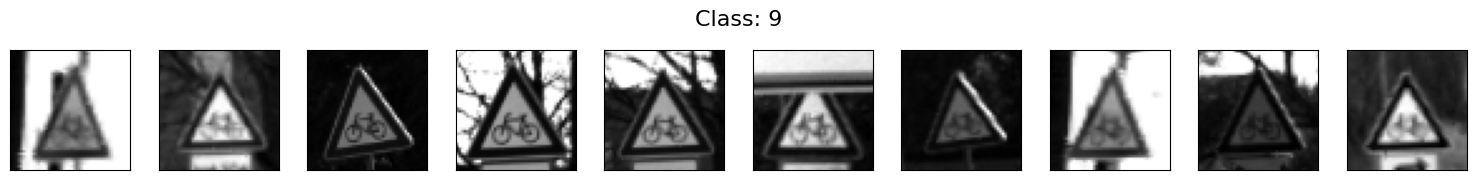

In [ ]:
def images_per_class(x):
    # Extracting unique class labels
    unique_classes = y_train_all.iloc[:, 0].unique()

    for label in unique_classes:
        # Filtering the rows (images) with the corresponding label
        subset_df = y_train_all[y_train_all.iloc[:, 0] == label]

        # Randomly selecting 10 rows from the subset
        selected_rows = subset_df.sample(10, replace=False)

        # Extracting the indices of the selected rows
        selected_indices = selected_rows.index
        plt.figure(figsize=(15, 2))

        for i, idx in enumerate(selected_indices):
            plt.subplot(1, 10, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(x.iloc[idx].values.reshape(48, 48), cmap='gray')
        plt.tight_layout()

        # Adjusting the space between subplots
        plt.subplots_adjust(top=0.9, bottom=0.3)
        plt.suptitle(f"Class: {int(label)}", fontsize=16, y=1.1)
        plt.show()

# Function call to display images for each class from the dataset
images_per_class(x_train_all)

### Anomaly Detection and Data Cleaning

**Extracting the instances with missing or null values**

In [ ]:
x_train_all[x_train_all.isnull().sum(axis=1) > 0]

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303


**Extracting the instances with outliers**

**Note:** Extracting the images if they contain pixel values more than 255 or less than 0 (out of bounds)

In [ ]:
x_train_all[x_train_all.gt(255).any(axis=1) | x_train_all.lt(0).any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303


**Extracting the duplicates**

In [ ]:
train_duplicates = x_train_all[x_train_all.duplicated()]

train_duplicate_indices = train_duplicates.index

print("Number of duplicate images:", len(train_duplicates) // 2) # To prevent it from displaying twice
print("Indices of duplicate images:", train_duplicate_indices.tolist())

Number of duplicate images: 0
Indices of duplicate images: []


### Class Frequency Distribution

**Viewing the number of instances per class**

**Note:** The values are sorted in ascending order of classes

In [ ]:
y_train_all.iloc[:, 0].value_counts().sort_index()

0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: 0, dtype: int64

**Plotting a histogram to view it in a graphical representation**

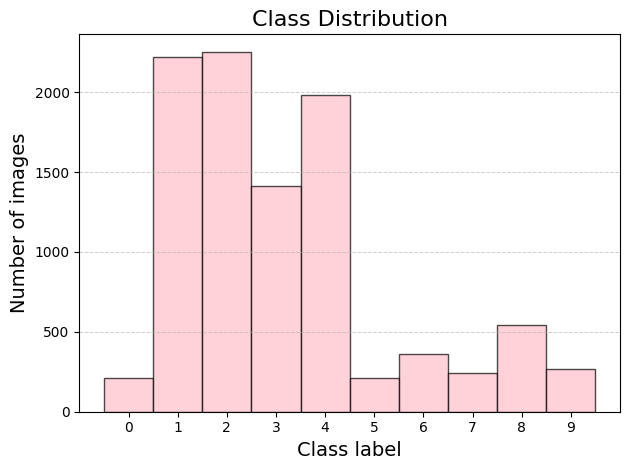

In [ ]:
def generate_class_distribution(y):
  labels_data = y.iloc[:, 0] # Getting all the labels

  # Defining the bins edges
  bins_edges = np.arange(labels_data.min() - 0.5, labels_data.max() + 1.5)  # 0.5 offset to center the integer label

  plt.hist(labels_data, bins=bins_edges, color='pink', edgecolor='black', alpha=0.7) # Plotting the histogram

  plt.title("Class Distribution", fontsize=16)
  plt.xlabel("Class label", fontsize=14)
  plt.ylabel("Number of images", fontsize=14)

  plt.xticks(np.arange(labels_data.min(), labels_data.max() + 1)) # Adjusting the x ticks for better readability

  plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

  plt.tight_layout()
  plt.show()

generate_class_distribution(y_train_all)

### Data Pre-Processing

**Normalizing the values using Min-Max**

**Note:** We utilized the min-max formula instead of directly diving by 255 since it would not be reasonable to assume that the min value is 0.

In [ ]:
x_train_all = x_train_all.astype('float')

min_value = x_train_all.values.min()
max_value = x_train_all.values.max()
x_train_normalized = (x_train_all - min_value) / (max_value - min_value)

**Viewing the first 5 normalized instances**

In [ ]:
x_train_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.297619,0.293651,0.289683,0.313492,0.333333,0.353175,0.400794,0.460317,0.452381,0.464286,...,0.333333,0.301587,0.273810,0.289683,0.317460,0.365079,0.380952,0.376984,0.365079,0.361111
1,0.277778,0.285714,0.301587,0.297619,0.289683,0.285714,0.341270,0.412698,0.515873,0.484127,...,0.369048,0.357143,0.325397,0.293651,0.261905,0.277778,0.317460,0.384921,0.388889,0.388889
2,0.273810,0.285714,0.301587,0.293651,0.309524,0.341270,0.404762,0.420635,0.329365,0.345238,...,0.376984,0.365079,0.337302,0.305556,0.277778,0.269841,0.281746,0.305556,0.341270,0.365079
3,0.253968,0.265873,0.281746,0.305556,0.357143,0.412698,0.424603,0.369048,0.261905,0.384921,...,0.432540,0.353175,0.333333,0.313492,0.293651,0.273810,0.265873,0.273810,0.309524,0.337302
4,0.281746,0.281746,0.277778,0.273810,0.293651,0.333333,0.400794,0.420635,0.321429,0.317460,...,0.384921,0.376984,0.380952,0.384921,0.380952,0.341270,0.297619,0.250000,0.257937,0.273810


**Comparison of the images before and after normalizing**


Before Normalizing



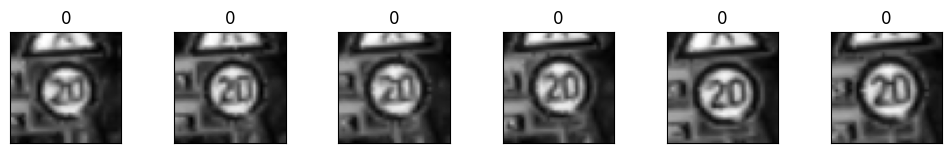


After Normalizing



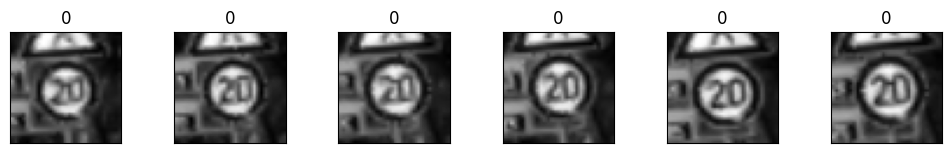

In [ ]:
print('\nBefore Normalizing\n')

some_images(x_train_all, 6, False)

print('\nAfter Normalizing\n')

some_images(x_train_normalized, 6, False)

### Pixel Intensity Distribution

**Granphically viewing all the normalized pixel intensity values**

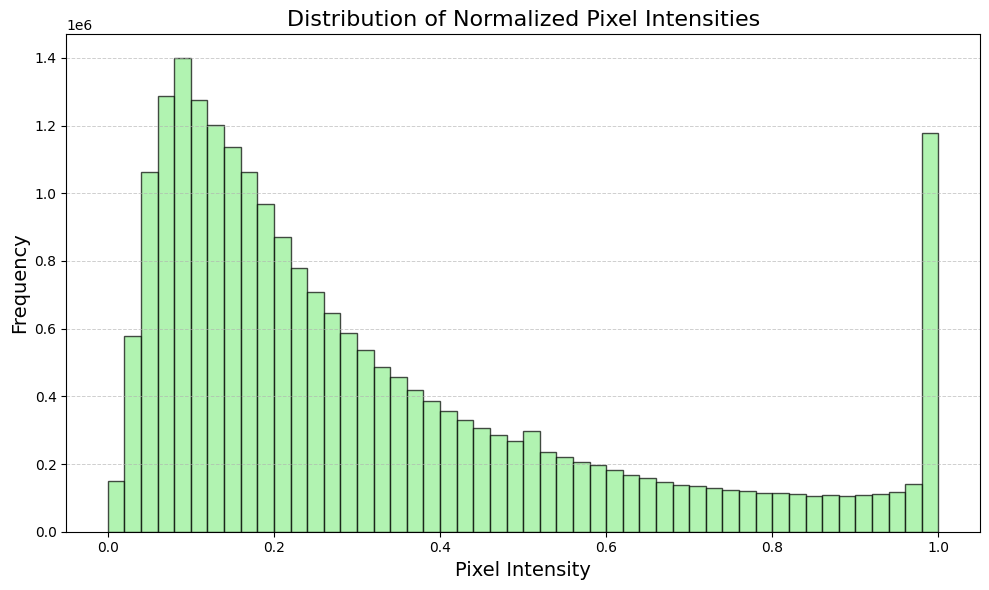

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting a histogram of the normalized pixel intensities
plt.hist(x_train_normalized.values.ravel(), bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Normalized Pixel Intensities", fontsize=16)
plt.xlabel("Pixel Intensity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

**Per class distribution of the normalized pixel intensity values**

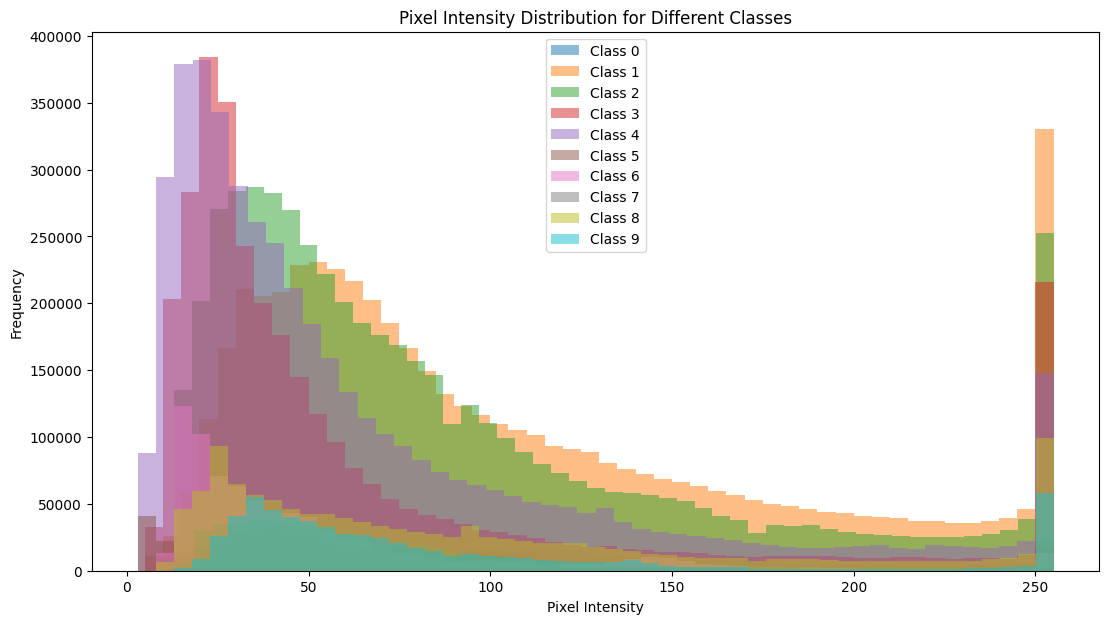

In [ ]:
# Filtering the labels
unique_classes = y_train_all.iloc[:, 0].unique()
plt.figure(figsize=(13, 7))

for label in unique_classes:
    # Getting the pixel values for images with the corresponding labels
    class_data = x_train_all[y_train_all.iloc[:, 0] == label]
    plt.hist(class_data.values.ravel(), bins=50, alpha=0.5, label=f"Class {label}")

plt.title("Pixel Intensity Distribution for Different Classes")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Implementing and Evaluating Naïve Bayes Classifier on the Dataset

**Objectives:**
* Process the Dataset: Perform a train-test split on the dataset.
* Model Training: Train Naive Bayes classifiers (Gaussian, Complement and Multinomail) and a non-naive bayes classifier (kNN) on the dataset.
* Performance Evaluation: Evaluate the classifier accuracies, precision, recall, etc. Additionally, perform cross validation with 10 k-folds.
* ROC Curves: Create ROC Curves for all models and classifiers.
* Model Comparison: Compare the classifier performances accuracies and ROC Curves.

###Dataset Training and Testing

In [ ]:
# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_normalized, y_train_all, test_size=0.2, random_state=0)

###Gaussian Naive Bayes

A probabilistic classifier that uses Bayes' theorem with the assumption of independence between features. It's particularly suited for continuous data and also assumes the features follow a Gaussian (normal) distribution.

**Running the Gaussian Naive Bayes Classifier on the dataset**

In [ ]:
clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train.values.ravel())

GaussianNB()

**Obtaining results from the Gaussian Naive Bayes classification**

**Note:** Consists of precision, recall, f1-score, support & accuracy

In [ ]:
y_pred=clf_gnb.predict(x_test)
y_pred_prob = clf_gnb.predict_proba(x_test)
print(classification_report(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.56      0.51        43
           1       0.47      0.50      0.49       416
           2       0.68      0.29      0.40       459
           3       0.55      0.35      0.43       284
           4       0.50      0.48      0.49       395
           5       1.00      0.41      0.58        54
           6       0.14      0.79      0.24        84
           7       0.90      0.58      0.70        45
           8       0.65      0.66      0.66       113
           9       0.33      0.42      0.37        45

    accuracy                           0.44      1938
   macro avg       0.57      0.50      0.49      1938
weighted avg       0.55      0.44      0.46      1938

Accuracy:  0.44324045407636736


**Performing cross-validation with 10 folds for Gaussian Naive Bayes on the Dataset**

In [ ]:
# Performing cross-validation with 10 folds
cross_validation = cross_val_score(clf_gnb, x_train, y_train.values.ravel(), cv=10)

# Displaying the results of cross-validation
print("Cross Validation Scores: ", cross_validation )
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.45231959 0.39304124 0.41806452 0.39354839 0.42580645 0.43096774
 0.4283871  0.42064516 0.45419355 0.40387097]

Cross Validation Mean:  0.422084469571001


###Multinomial Naive Bayes

A variant of the Naive Bayes classifier designed specifically for categorical data or for data that can easily be turned into counts, such as text.



**Running the Multinomial Naive Bayes Classifier on the dataset**

In [ ]:
# Initializing Multinomial Naive Bayes

clf_multinomial = MultinomialNB()
clf_multinomial.fit(x_train,y_train.values.ravel())

MultinomialNB()

In [ ]:
y_pred = clf_multinomial.predict(x_test)
y_pred_multinom_proba = clf_multinomial.predict_proba(x_test)
print(classification_report(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.49      0.19        43
           1       0.41      0.20      0.27       416
           2       0.41      0.30      0.35       459
           3       0.37      0.40      0.38       284
           4       0.40      0.63      0.49       395
           5       0.24      0.56      0.34        54
           6       0.10      0.02      0.04        84
           7       0.32      0.29      0.30        45
           8       0.69      0.34      0.45       113
           9       0.25      0.29      0.27        45

    accuracy                           0.36      1938
   macro avg       0.33      0.35      0.31      1938
weighted avg       0.39      0.36      0.35      1938

Accuracy:  0.3622291021671827


In [ ]:
# Performing cross-validation with 10 folds
cross_validation = cross_val_score(clf_multinomial, x_train, y_train.values.ravel(), cv=10)

# Displaying the results of cross-validation
print("Cross Validation Scores: ", cross_validation )
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.36984536 0.3492268  0.3483871  0.35741935 0.33806452 0.34580645
 0.35483871 0.37290323 0.37290323 0.37419355]

Cross Validation Mean:  0.3583588293980712


###Complement Naive Bayes

An adaptation of the standard multinomial naive bayes algorithm, often used for imbalanced data sets. It calculates the complement of each class to compute the model's weights.

**Running the Complement Naive Bayes Classifier on the dataset**

In [ ]:
# Initializing Complement Naive Bayes

clf_complement = ComplementNB()
clf_complement.fit(x_train,y_train.values.ravel())

ComplementNB()

In [ ]:
y_pred=clf_complement.predict(x_test)
y_pred_complement_proba = clf_complement.predict_proba(x_test)
print(classification_report(y_test, y_pred, zero_division=1))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        43
           1       0.49      0.22      0.30       416
           2       0.34      0.59      0.43       459
           3       0.23      0.48      0.31       284
           4       0.54      0.45      0.49       395
           5       1.00      0.00      0.00        54
           6       1.00      0.00      0.00        84
           7       0.00      0.00      0.00        45
           8       0.59      0.20      0.30       113
           9       1.00      0.00      0.00        45

    accuracy                           0.36      1938
   macro avg       0.62      0.19      0.18      1938
weighted avg       0.48      0.36      0.33      1938

Accuracy:  0.35964912280701755


In [ ]:
cross_validation = cross_val_score(clf_complement, x_train, y_train.values.ravel(), cv=10)
print("Cross Validation Scores: ", cross_validation )
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.38659794 0.34407216 0.33935484 0.29677419 0.34451613 0.33290323
 0.36       0.36258065 0.36645161 0.33032258]

Cross Validation Mean:  0.34635733288992354


###ROC Curves for all models

**Plotting Receiver Operating Characteristic (ROC) for multi-class data**

**Parameters:**

*   y_prob (array-like, shape = [n_samples, n_classes]): Probabilities of the positive class

*  y_test (DataFrame): True labels with labels in column '0'

*  n_classes (int): Number of classes in the dataset

**Returns:**

*  A ROC plot for each class.

In [ ]:
def gen_roc(y_prob, y_test, n_classes):

    # Initializing dictionaries to store the False Positive Rate (FPR), True Positive Rate (TPR) for each class and AUC (Area Under Curve)
    false_positive_rate = dict()
    true_positive_rate = dict()
    area_under_curve = dict()

    # Creating OnevrsAll for all the classes of the dataset
    create_onevrsalls = pd.get_dummies(y_test['0'], drop_first=False).values

    # Calculate TPR, FPR, and AUC for each class.
    for i in range(n_classes):
        false_positive_rate[i], true_positive_rate[i], _ = roc_curve(create_onevrsalls[:, i], y_prob[:, i])
        area_under_curve[i] = auc(false_positive_rate[i], true_positive_rate[i])

    # Initialize the plotting figure.
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotting a diagonal line, which represents a random classifier and setting x,y limits, labels, title, legend and gridlines
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    ax.legend(loc="best")
    sns.despine()


    # Plotting the ROC curve for each class.
    for i in range(n_classes):
        ax.plot(false_positive_rate[i], true_positive_rate[i], label='ROC curve (area = %0.2f) for label %i' % (area_under_curve[i], i))

    # Displaying the plot
    plt.show()

**ROC Curve for Classifiers**

We've chosen macro-averaging over techniques like micro-averaging to combine the ROC curves for each class. Given the significant class imbalance in our dataset, micro-averaging might mask individual class performance. Macro-averaging ensures that we evaluate the model's performance for each class equally, which is crucial for our problem.

In [ ]:
def plot_multiclass_roc_with_macro_avg(y_true, y_score_list, class_names, model_names, figsize=(17, 6)):
    n_classes = len(class_names)
    plt.figure(figsize=figsize)

    y_true_bin = label_binarize(y_true, classes=range(n_classes))

    for idx, y_score in enumerate(y_score_list):
        # Compute ROC curve and ROC area for each class
        fpr_list = []
        tpr_list = []
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
            fpr_list.append(fpr)
            tpr_list.append(tpr)

        # Aggregate and compute macro-average ROC curve
        all_fpr = np.unique(np.concatenate(fpr_list))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr_list[i], tpr_list[i])
        mean_tpr /= n_classes

        fpr_macro = all_fpr
        tpr_macro = mean_tpr
        roc_auc_macro = auc(fpr_macro, tpr_macro)

        plt.plot(fpr_macro, tpr_macro, label=f'{model_names[idx]}, Macro-average ROC curve (area = {roc_auc_macro:0.2f})', linestyle='-', linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Macro-averaged ROC curve')
    plt.legend(loc="lower right")
    plt.show()

### kNN Classifier

The kNN classifier, short for "k-Nearest Neighbors", is a method where an input is classified based on the majority class of its 'k' closest examples from the dataset

In our case, we took 1 to 100 nearest neighbors to plot a graph and identify

In [ ]:
# Initializing a list to store accuracy values for different 'k' in kNN
knn_accuracies = []

# Initializing a list to store test and training scores for different 'k'
knn_scores = []

# Looping through values of 'k' from 1 to 100 to evaluate kNN performance
for i in range(1,101):

    clf_knn = KNeighborsClassifier(n_neighbors=i)

    # Training the kNN classifier using the training data
    clf_knn.fit(x_train, y_train.values.ravel())
    y_pred = clf_knn.predict(x_test)

    # Calculating accuracy of the classifier on the test and training set
    test_score = clf_knn.score(x_test, y_test)
    train_score = clf_knn.score(x_train, y_train)

    # Adding the test and training scores to the list
    knn_scores.append((i, test_score, train_score))

    # Calculating and adding the accuracy scores to a list
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)

**Visualizing the test and training scores vs. number of neighbors**

In [ ]:
# Creating a DataFrame to visualize
df = pd.DataFrame(knn_scores, columns=['K','Test Score','Train Score'])

**Graphical Representation of Accuracy vs. KNN no. of neighbours**

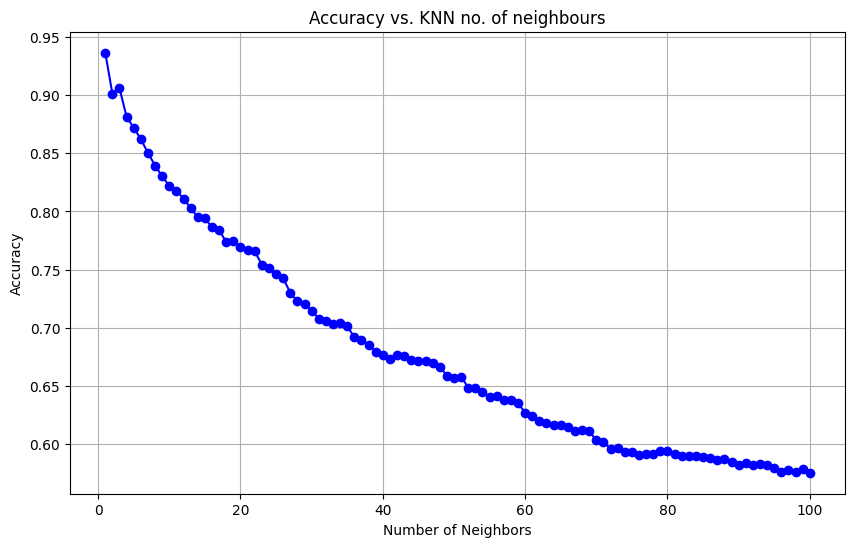

In [ ]:
# Plotting accuracy vs number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), knn_accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. KNN no. of neighbours')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

**Graphical Representation of Train Score vs. Test Score vs. No. of Neighbors**

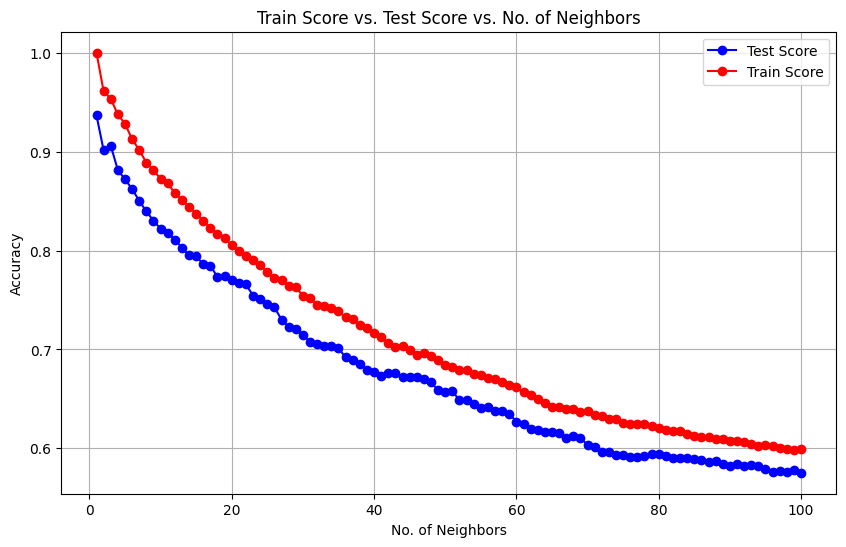

In [ ]:
# Plotting training and testing accuracy vs number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(df['K'], df['Test Score'], marker='o', linestyle='-', color='b', label='Test Score')
plt.plot(df['K'], df['Train Score'], marker='o', linestyle='-', color='r', label='Train Score')
plt.title('Train Score vs. Test Score vs. No. of Neighbors')
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Performing cross-validation**

**Note:** Implementing with 10 folds on the kNN classifier results with k=3 (optimal value as inferred from the graph)

In [ ]:
# Performing cross-validation with 10 folds with k=3, since it's optimal (as seen in the graph)
cross_validation = cross_val_score(clf_knn, x_train, y_train.values.ravel(), cv=10)

# Displaying the results of cross-validation
print("Cross Validation Scores: ", cross_validation)
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.60824742 0.55541237 0.59870968 0.55225806 0.56387097 0.57548387
 0.55096774 0.57677419 0.57290323 0.55354839]

Cross Validation Mean:  0.5708175922846691


###Stratified vs Non-Stratified Data

**To compare the effectiveness and accuracy of stratified vs. non-stratified methods.**

* Stratified Sampling: A method that divides the entire population into distinct subgroups or strata based on certain characteristics.
* Non-stratified Sampling: A method where individuals are selected entirely by chance from the entire population.

####Non-Stratified Data



**Train-test split without stratification**

In [ ]:
# Splitting the data without stratification
X_train, X_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=0)

**Printing the shapes with stratification**  

In [ ]:
# Printing the shapes of data without stratification
print("Shapes without Stratification:")
print("X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape, "x_train_all:", x_train_all.shape)

Shapes without Stratification:
X_train: (7752, 2304) X_test: (1938, 2304) y_train: (7752, 1) y_test: (1938, 1) x_train_all: (9690, 2304)


In [ ]:
# Function to print and plot the class representation percentage.
def class_representation(data, title):

    # Total no. of samples
    total = data.count()

    # Initializing an empty list to store the percentage representation for each class
    perc_list = []

    print("\n" + title)
    print("Class Representation")

    # Enumerate over each unique class and its count in the data
    for i, j in enumerate(data.groupby('0')['0'].count()):
        # Calculate the percentage representation of the class
        percentage = round((j/int(total))*100,2)
        print(i, "\t", str(percentage) + " %")
        perc_list.append(percentage)

    print("\n")
    # Plotting a graph for representation
    plt.bar(range(len(perc_list)), perc_list)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.show()


**Generated the values and graphs for class representation with stratification**


Training Data Class Representation without Stratification
Class Representation
0 	 2.15 %
1 	 23.27 %
2 	 23.1 %
3 	 14.53 %
4 	 20.45 %
5 	 2.01 %
6 	 3.56 %
7 	 2.52 %
8 	 5.51 %
9 	 2.9 %




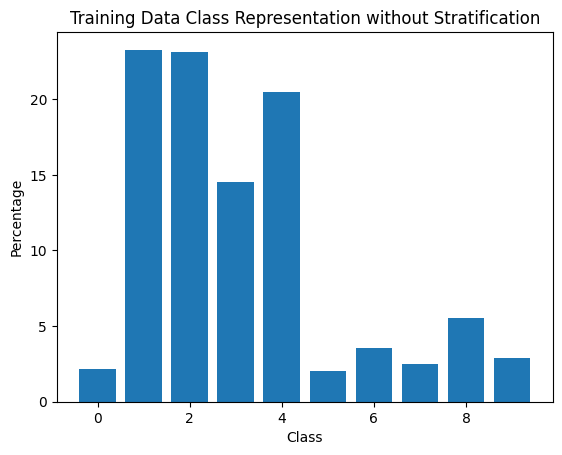




Test Data Class Representation without Stratification
Class Representation
0 	 2.22 %
1 	 21.47 %
2 	 23.68 %
3 	 14.65 %
4 	 20.38 %
5 	 2.79 %
6 	 4.33 %
7 	 2.32 %
8 	 5.83 %
9 	 2.32 %




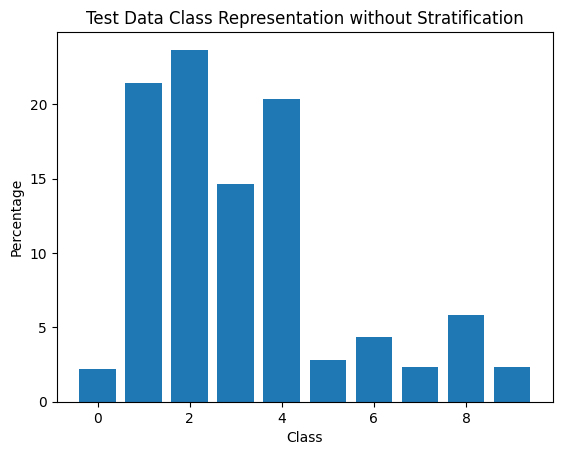

In [ ]:
class_representation(y_train, "Training Data Class Representation without Stratification")
print("\n")
class_representation(y_test, "Test Data Class Representation without Stratification")

####Stratified

**Train-test split with stratification**

In [ ]:
# Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=0, stratify=y_train_all)

**Printing the shapes with stratification**  

In [ ]:
print("\nShapes with Stratification:")
print("X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape, "x_train_all:", x_train_all.shape)


Shapes with Stratification:
X_train: (7752, 2304) X_test: (1938, 2304) y_train: (7752, 1) y_test: (1938, 1) x_train_all: (9690, 2304)


**Generated the values and graphs for class representation with stratification**


Training Data Class Representation with Stratification
Class Representation
0 	 2.17 %
1 	 22.91 %
2 	 23.22 %
3 	 14.55 %
4 	 20.43 %
5 	 2.17 %
6 	 3.72 %
7 	 2.48 %
8 	 5.57 %
9 	 2.79 %




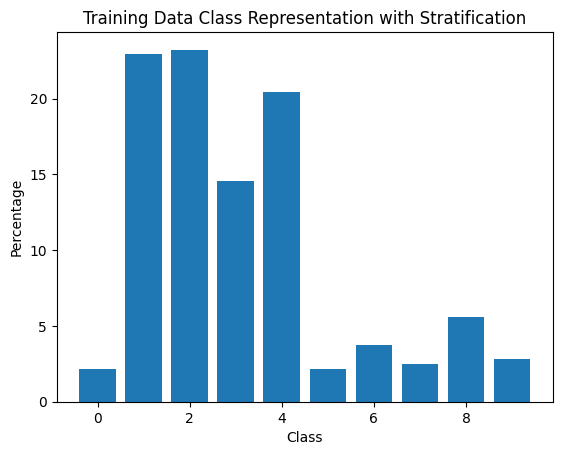




Test Data Class Representation with Stratification
Class Representation
0 	 2.17 %
1 	 22.91 %
2 	 23.22 %
3 	 14.55 %
4 	 20.43 %
5 	 2.17 %
6 	 3.72 %
7 	 2.48 %
8 	 5.57 %
9 	 2.79 %




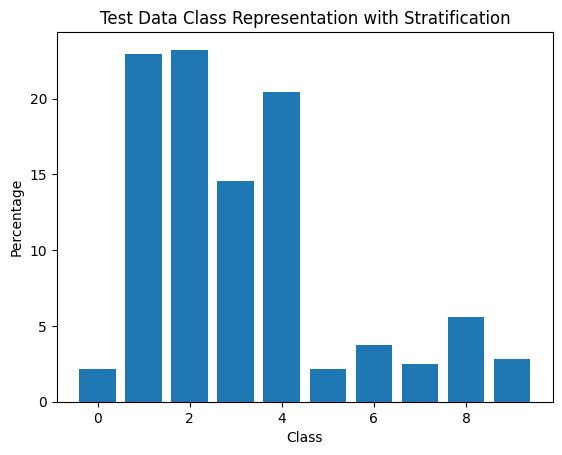

In [ ]:
class_representation(y_train, "Training Data Class Representation with Stratification")
print("\n")
class_representation(y_test, "Test Data Class Representation with Stratification")

##Feature Selection

**Objectives:**


*   Visualise the correlating features spatially
*   Correlation of Features: Get the most correlated features between individual classes

*   Generate datasets: Create datasets with the 5, 10 and 20 most correlated features acquired and store them in the drive to utilize it later



####Heatmap of the general correlation for the entire dataset

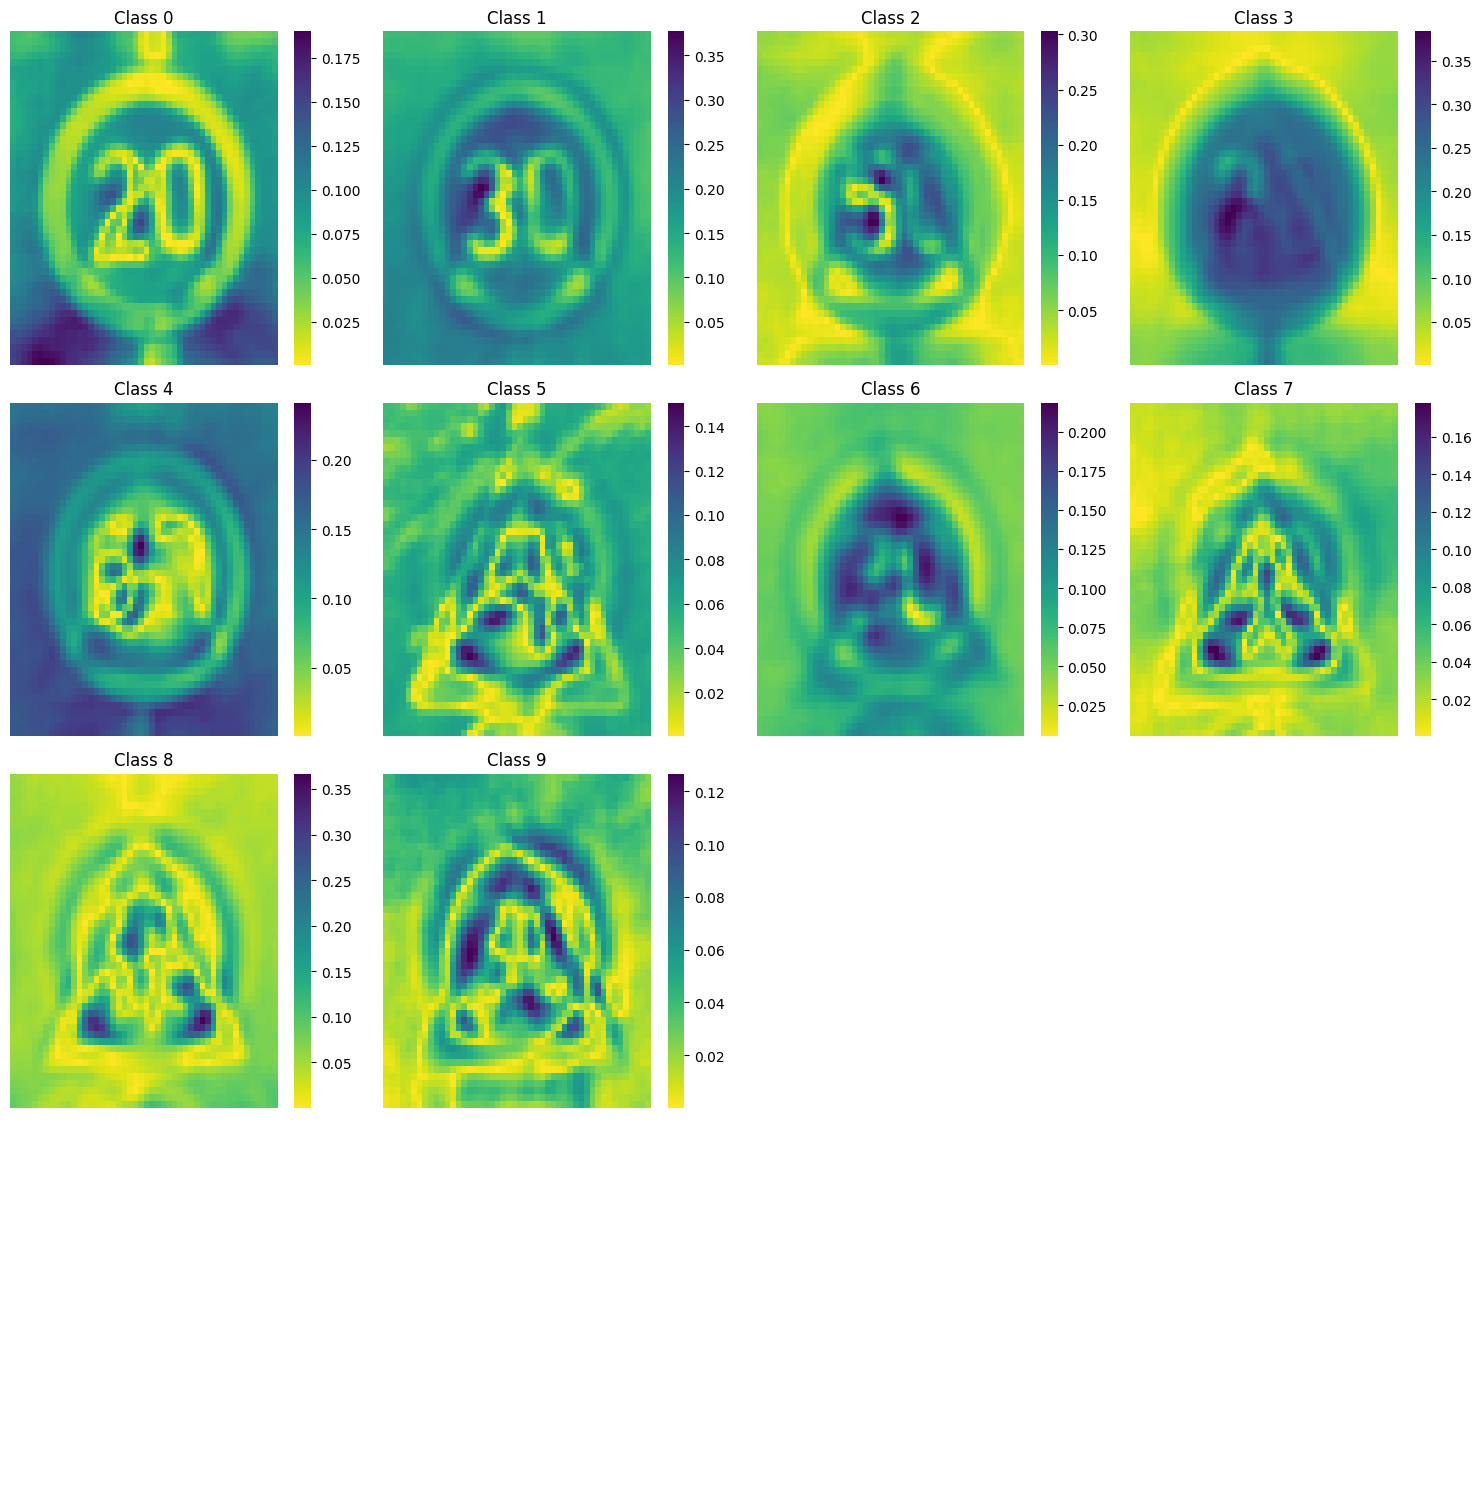

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datasets = []
for i in range(10):
  data = pd.read_csv('/content/drive/MyDrive/F20DL_Data/Traffic_Sign/CompleteDataSet/x_train_all.csv')
  data['label'] = pd.read_csv('/content/drive/MyDrive/F20DL_Data/Traffic_Sign/OnevrsAll/'+str(i)+'_vrs_all/y_train_'+str(i)+'.csv')
  datasets.append(data)

num_images = len(datasets)
grid_size = int(np.ceil(np.sqrt(num_images)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Ensure all subplots are used, even if the number of datasets is not a perfect square
for ax in axes.ravel():
    ax.axis('off')

for i, dataset in enumerate(datasets):
    # Compute the correlation of each pixel with the target
    correlations = dataset.drop(columns=['label']).apply(lambda x: x.corr(dataset['label']))
    # Reshape the correlations to match the original image shape
    correlation_matrix = correlations.values.reshape(48, 48)
    correlation_matrix = np.absolute(correlation_matrix)

    # Plot heatmap
    row = i // grid_size
    col = i % grid_size
    sns.heatmap(correlation_matrix, cmap='viridis_r', ax=axes[row, col])
    axes[row, col].set_title(f'Class {i}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


**We first find the highest correlating features for every class and create the heatmaps accordingly. This shows some classes having a good and reasonable location for the highest correlated features.**

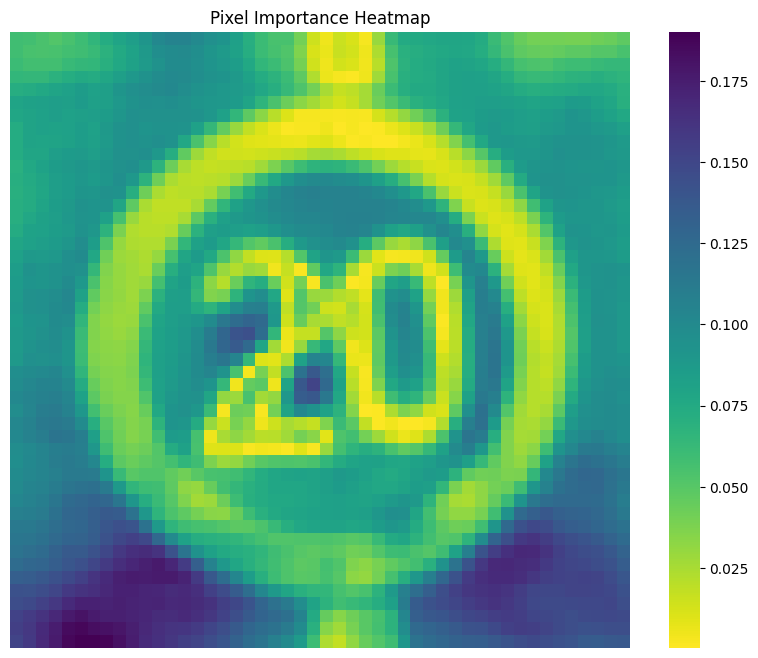

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/F20DL_Data/Traffic_Sign/CompleteDataSet/x_train_all.csv')
data['label'] = pd.read_csv('/content/drive/MyDrive/F20DL_Data/Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv')
correlations = data.drop(columns=['label']).apply(lambda x: x.corr(data['label']))
correlation_matrix = correlations.values.reshape(48, 48)
correlation_matrix = np.absolute(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis_r')
plt.title('Pixel Importance Heatmap')
plt.axis('off')
plt.show()

### Correlation of Features with Individual Classes


**Collect all the OnevsAll files in an array**

In [ ]:
y_vsall = []

for i in range(10):
  path = '/content/drive/MyDrive/F20DL_Data/Traffic_Sign/OnevrsAll/'+str(i)+'_vrs_all/y_train_'+str(i)+'.csv'
  df = pd.read_csv(path, names=['y']).drop(0).reset_index(drop=True)
  y_vsall.append(df)

y_vsall[0].tail()

,y
9685,1
9686,1
9687,1
9688,1
9689,1


**Inspecting and checking the data**

In [ ]:
y_vsall[0].shape

(9690, 1)

**Merging each OnevsAll dataset to the x_train dataset and storing in array**

**Note:** We are merging it into one dataset because it is easier to find a correlation between pixels

In [ ]:
allMerged = []
for i in range(10):
  allMerged.append(x_train_normalized.merge(y_vsall[i], left_index=True, right_index=True))

**Observing the data and checking for errors**

In [ ]:
allMerged[0].head(5)

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,y
0,0.297619,0.293651,0.289683,0.313492,0.333333,0.353175,0.400794,0.460317,0.452381,0.464286,...,0.301587,0.273810,0.289683,0.317460,0.365079,0.380952,0.376984,0.365079,0.361111,0
1,0.277778,0.285714,0.301587,0.297619,0.289683,0.285714,0.341270,0.412698,0.515873,0.484127,...,0.357143,0.325397,0.293651,0.261905,0.277778,0.317460,0.384921,0.388889,0.388889,0
2,0.273810,0.285714,0.301587,0.293651,0.309524,0.341270,0.404762,0.420635,0.329365,0.345238,...,0.365079,0.337302,0.305556,0.277778,0.269841,0.281746,0.305556,0.341270,0.365079,0
3,0.253968,0.265873,0.281746,0.305556,0.357143,0.412698,0.424603,0.369048,0.261905,0.384921,...,0.353175,0.333333,0.313492,0.293651,0.273810,0.265873,0.273810,0.309524,0.337302,0
4,0.281746,0.281746,0.277778,0.273810,0.293651,0.333333,0.400794,0.420635,0.321429,0.317460,...,0.376984,0.380952,0.384921,0.380952,0.341270,0.297619,0.250000,0.257937,0.273810,0


In [ ]:
allMerged[0].shape

(9690, 2305)

**Creating a correlation matrix for each dataset**

In [ ]:
allCorr = []
for i in range(10):
  allCorr.append(allMerged[i].corr())

**Storing as csv files**

**Note:** Will be reused later to avoid computing the correlation again (it takes 28 minutes to run)

In [ ]:
for i in range(10):
  path = '/content/drive/MyDrive/F20DL_Data/Traffic_Sign/OnevrsAll/'+str(i)+'_vrs_all/'+str(i)+'vCorr.csv'
  allCorr[i].to_csv(path)

**Viewing a few correlated features selected**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/F20DL_Data/Traffic_Sign/OnevrsAll/0_vrs_all/0vCorr.csv',index_col="Unnamed: 0", low_memory=False)
df['y'].sort_values(ascending=False, key=abs).head(6)[1:].keys().to_list()

['2261', '2262', '2263', '2213', '2260']

###Generating Datasets

**Implementing a function to generate a dataset function**

**Note:** It takes in an integer parameter n and returns the n most correlated columns/features. The correlated pixels were computed before and stored in a CSV file.

In [ ]:
dfbase = x_train_normalized

def gen_dataset(features):

  # To store the top correlating pixels for all classes
  pixels = []

  for i in range(10):
    path = '/content/drive/MyDrive/F20DL_Data/Traffic_Sign/OnevrsAll/'+str(i)+'_vrs_all/'+str(i)+'vCorr.csv'
    imp_corr = pd.read_csv(path, index_col="Unnamed: 0", low_memory=False)
    # Getting the top correlating pixels for the current class
    x_most_corr = imp_corr['y'].sort_values(ascending=False, key=abs).head(features+1)[1:].keys().tolist()

    for j in x_most_corr:
      pixels.append(str(j))

    print(str(i)+" Complete")

    # Removing any duplicate pixels from the list
    pixels = list(set(pixels))
    print(pixels)

  new_df = dfbase[pixels] # The top correlating pixels for all classes

  # Print the number of total features in the dataset
  print(f"\nTotal number of features in the dataset for top {features*10}: {len(pixels)}\n")

  return new_df

new_df1 = gen_dataset(5)
new_df1.to_csv('/content/drive/MyDrive/F20DL_Data/Traffic_Sign/Dataset1.csv')
new_df2 = gen_dataset(10)
new_df2.to_csv('/content/drive/MyDrive/F20DL_Data/Traffic_Sign/Dataset2.csv')
new_df3 = gen_dataset(20)
new_df3.to_csv('/content/drive/MyDrive/F20DL_Data/Traffic_Sign/Dataset3.csv')

0 Complete
['2262', '2263', '2213', '2261', '2260']
1 Complete
['1086', '1263', '2262', '2263', '1216', '2213', '1134', '2261', '2260', '1215']
2 Complete
['1086', '1268', '1263', '1030', '2262', '2263', '1216', '2213', '1134', '1317', '2261', '1269', '1316', '2260', '1215']
3 Complete
['1263', '1313', '1086', '1030', '2213', '1269', '2260', '1266', '1268', '2262', '2263', '1216', '1134', '1219', '2261', '1218', '1265', '1317', '1316', '1215']
4 Complete
['1263', '983', '1313', '1086', '1030', '2213', '1269', '2260', '1266', '1268', '2262', '982', '2263', '1216', '1134', '1219', '935', '2261', '1218', '1265', '1317', '1031', '1316', '1215']
5 Complete
['1507', '1263', '983', '1313', '1086', '1030', '1743', '1742', '2213', '1269', '2260', '1266', '1744', '1268', '2262', '982', '2263', '1216', '1134', '1219', '935', '2261', '1218', '1265', '1508', '1317', '1031', '1316', '1215']
6 Complete
['1507', '1263', '983', '1313', '1086', '1030', '1743', '794', '1742', '2213', '842', '1269', '2260

## Applying Naïve Bayes on Generated Datasets

**Objectives:**

*   Load the 3 generated datasets
*   Confirm if they are loaded correctly
*   Run the Gaussian Naïve Bayes classifiers on the 3 datasets



### Loading and Confirming the datasets

In [ ]:
# Complete data path for reusability
data_path_new = "/content/drive/MyDrive/F20DL_Data/Traffic_Sign/"

# X (Attributes) train file
x_train_top5 = pd.read_csv(data_path_new + "Dataset1.csv",  index_col=['Unnamed: 0'])
x_train_top10 = pd.read_csv(data_path_new + "Dataset2.csv", index_col=['Unnamed: 0'])
x_train_top20 = pd.read_csv(data_path_new + "Dataset3.csv", index_col=['Unnamed: 0'])

Checking the dataset

In [ ]:
x_train_top5

,1507,1263,1715,1761,1694,983,1313,1086,1030,1743,...,841,1218,1265,1695,1508,1317,1666,1031,1316,1215
0,0.563492,0.884921,0.365079,0.416667,0.404762,0.801587,0.884921,0.476190,0.603175,0.456349,...,0.861111,0.873016,0.892857,0.424603,0.527778,0.595238,0.392857,0.702381,0.547619,0.861111
1,0.559524,0.476190,0.428571,0.515873,0.384921,0.634921,0.857143,0.722222,0.511905,0.376984,...,0.936508,0.896825,0.880952,0.380952,0.571429,0.480159,0.380952,0.527778,0.615079,0.480159
2,0.595238,0.813492,0.440476,0.527778,0.420635,0.642857,0.845238,0.626984,0.523810,0.432540,...,0.912698,0.873016,0.896825,0.412698,0.630952,0.460317,0.388889,0.464286,0.476190,0.765873
3,0.686508,0.746032,0.448413,0.519841,0.428571,0.555556,0.765873,0.690476,0.492063,0.404762,...,0.900794,0.809524,0.841270,0.424603,0.781746,0.535714,0.436508,0.519841,0.416667,0.805556
4,0.412698,0.817460,0.309524,0.392857,0.357143,0.884921,0.900794,0.539683,0.587302,0.353175,...,0.837302,0.761905,0.888889,0.301587,0.345238,0.444444,0.400794,0.742063,0.607143,0.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,0.194444,0.063492,0.305556,0.408730,0.428571,0.428571,0.440476,0.059524,0.424603,0.361111,...,0.321429,0.444444,0.400794,0.261905,0.182540,0.373016,0.380952,0.432540,0.257937,0.063492
9686,0.178571,0.067460,0.313492,0.400794,0.408730,0.412698,0.416667,0.059524,0.412698,0.313492,...,0.373016,0.424603,0.412698,0.210317,0.206349,0.269841,0.376984,0.412698,0.214286,0.063492
9687,0.246032,0.059524,0.365079,0.392857,0.388889,0.408730,0.420635,0.063492,0.400794,0.321429,...,0.361111,0.400794,0.404762,0.214286,0.190476,0.162698,0.376984,0.408730,0.174603,0.059524
9688,0.206349,0.055556,0.337302,0.357143,0.392857,0.380952,0.384921,0.063492,0.380952,0.357143,...,0.349206,0.380952,0.373016,0.230159,0.194444,0.119048,0.357143,0.384921,0.119048,0.051587


In [ ]:
x_train_top5.shape

(9690, 40)

### Running the classifier on the Top 5 features dataset

In [ ]:
# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_top5, y_train_all, test_size=0.2, random_state=42)

clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train.values.ravel())

GaussianNB()

**Obtaining results from the Gaussian Naive Bayes classifier for Dataset 1**

**Note:** Consists of precision, recall, f1-score, support & accuracy

In [ ]:
y_pred_gnb_dataset1=clf_gnb.predict(x_test)
y_pred_prob_gnb_top5 = clf_gnb.predict_proba(x_test)
print(classification_report(y_test,y_pred_gnb_dataset1))
print("Accuracy: ", accuracy_score(y_test, y_pred_gnb_dataset1))

              precision    recall  f1-score   support

           0       0.23      0.70      0.35        46
           1       0.63      0.31      0.41       451
           2       0.55      0.48      0.51       457
           3       0.32      0.66      0.43       288
           4       0.29      0.06      0.10       392
           5       0.69      0.20      0.32        44
           6       0.26      0.81      0.39        69
           7       0.47      0.32      0.38        47
           8       0.59      0.54      0.56        91
           9       0.21      0.64      0.32        53

    accuracy                           0.40      1938
   macro avg       0.42      0.47      0.38      1938
weighted avg       0.46      0.40      0.37      1938

Accuracy:  0.39525283797729616


**Performing cross-validation with 10 folds for Gaussian Naive Bayes on Dataset 1**

In [ ]:
# Performing cross-validation with 10 folds
cross_validation = cross_val_score(clf_gnb, x_train, y_train.values.ravel(), cv=10)

# Displaying the results of cross-validation
print("Cross Validation Scores: ", cross_validation )
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.37757732 0.35953608 0.3883871  0.38322581 0.37548387 0.39741935
 0.35741935 0.38064516 0.35741935 0.41032258]

Cross Validation Mean:  0.37874359827070164


### Running the classifier on the Top 10 features dataset

In [ ]:
# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_top10, y_train_all, test_size=0.2, random_state=42)

clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train.values.ravel())

GaussianNB()

**Obtaining results from the Gaussian Naive Bayes classifier for Dataset 2**

**Note:** Consists of precision, recall, f1-score, support & accuracy

In [ ]:
y_pred_gnb_dataset2=clf_gnb.predict(x_test)
y_pred_prob_gnb_top10 = clf_gnb.predict_proba(x_test)
print(classification_report(y_test,y_pred_gnb_dataset2))
print("Accuracy: ", accuracy_score(y_test, y_pred_gnb_dataset2))

              precision    recall  f1-score   support

           0       0.22      0.74      0.34        46
           1       0.66      0.31      0.42       451
           2       0.52      0.44      0.48       457
           3       0.35      0.40      0.37       288
           4       0.28      0.08      0.12       392
           5       0.60      0.20      0.31        44
           6       0.12      0.83      0.21        69
           7       0.42      0.45      0.43        47
           8       0.69      0.49      0.58        91
           9       0.23      0.70      0.34        53

    accuracy                           0.36      1938
   macro avg       0.41      0.46      0.36      1938
weighted avg       0.46      0.36      0.36      1938

Accuracy:  0.35552115583075333


**Performing cross-validation with 10 folds for Gaussian Naive Bayes on Dataset 2**

In [ ]:
# Performing cross-validation with 10 folds
cross_validation = cross_val_score(clf_gnb, x_train, y_train.values.ravel(), cv=10)

# Displaying the results of cross-validation
print("Cross Validation Scores: ", cross_validation )
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.33634021 0.33634021 0.35612903 0.35354839 0.33548387 0.37032258
 0.32129032 0.37419355 0.32903226 0.37677419]

Cross Validation Mean:  0.34894546059195214


### Running the classifier on the Top 20 features dataset

In [ ]:
# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_top20, y_train_all, test_size=0.2, random_state=42)

clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train.values.ravel())

GaussianNB()

**Obtaining results from the Gaussian Naive Bayes classifier for Dataset 3**

**Note:** Consists of precision, recall, f1-score, support & accuracy

In [ ]:
y_pred_gnb_dataset3=clf_gnb.predict(x_test)
y_pred_prob_gnb_top20 = clf_gnb.predict_proba(x_test)
print(classification_report(y_test,y_pred_gnb_dataset3))
print("Accuracy: ", accuracy_score(y_test, y_pred_gnb_dataset3))

              precision    recall  f1-score   support

           0       0.23      0.76      0.35        46
           1       0.62      0.28      0.38       451
           2       0.49      0.41      0.44       457
           3       0.36      0.35      0.36       288
           4       0.30      0.09      0.13       392
           5       0.78      0.16      0.26        44
           6       0.11      0.84      0.20        69
           7       0.38      0.49      0.43        47
           8       0.63      0.41      0.49        91
           9       0.22      0.75      0.35        53

    accuracy                           0.33      1938
   macro avg       0.41      0.45      0.34      1938
weighted avg       0.45      0.33      0.34      1938

Accuracy:  0.3333333333333333


**Performing cross-validation with 10 folds for Gaussian Naive Bayes on Dataset 3**

In [ ]:
# Performing cross-validation with 10 folds
cross_validation = cross_val_score(clf_gnb, x_train, y_train.values.ravel(), cv=10)

# Displaying the results of cross-validation
print("Cross Validation Scores: ", cross_validation )
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.31056701 0.32087629 0.33032258 0.34064516 0.30967742 0.34967742
 0.30967742 0.3483871  0.30967742 0.35225806]

Cross Validation Mean:  0.3281765879614233


## Principal Component Analysis

Principal Component Analysis (PCA) is a statistical method used to reduce the number of variables in a dataset by extracting the most important ones, while retaining as much of the original data variance as possible.

####Applying Standardization to the training dataset

In [ ]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(x_train_normalized)
scaled_train

array([[-0.15039878, -0.16202714, -0.17251929, ...,  0.47288363,
         0.43276125,  0.41898493],
       [-0.21490048, -0.18785807, -0.13373277, ...,  0.50423353,
         0.52734801,  0.52921589],
       [-0.22780082, -0.18785807, -0.13373277, ...,  0.19073454,
         0.33817449,  0.43473221],
       ...,
       [ 2.13296126,  2.13692606,  2.14174305, ..., -0.577338  ,
        -0.45004847, -0.38412639],
       [ 2.13296126,  2.11109513,  2.14174305, ..., -0.65571275,
        -0.65498644, -0.68332473],
       [ 2.09426025,  1.28450521,  1.92195277, ..., -0.65571275,
        -0.74957319, -0.79355569]])

#### Exploring the explained variance ratio derived from different number of components

In [ ]:
nums = np.arange(50,550,50)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_train)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

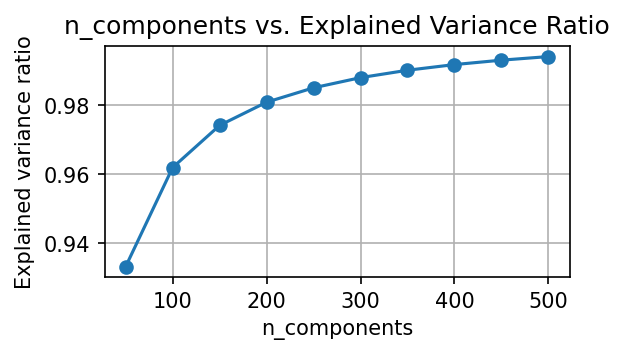

In [ ]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

###Investigating the effect of the component count on the accuracy of a naive bayes algorithm

In [ ]:
nums = np.arange(50,550,50)
NB_PCA_Accuracies = []
nb_pca_proba = []
for num in nums:
  pca = PCA(n_components=num)
  train_pca = pca.fit_transform(x_train_all)
  x_train, x_test, y_train, y_test = train_test_split(train_pca, y_train_all, test_size=0.2, random_state=0)
  clf_train_all = GaussianNB()
  clf_train_all.fit(x_train,y_train.values.ravel())
  y_pred=clf_train_all.predict(x_test)
  y_pred_prob_gnb_pca = clf_train_all.predict_proba(x_test)
  nb_pca_proba.append(y_pred_prob_gnb_pca)

  accuracy = accuracy_score(y_test, y_pred)
  NB_PCA_Accuracies.append(accuracy)
  print("==================================================")
  print("Number of components = " + str(num))
  print("Accuracy: ", accuracy)
  print("==================================================")

Number of components = 50
Accuracy:  0.38854489164086686
Number of components = 100
Accuracy:  0.4375644994840041
Number of components = 150
Accuracy:  0.4308565531475748
Number of components = 200
Accuracy:  0.4040247678018576
Number of components = 250
Accuracy:  0.36480908152734776
Number of components = 300
Accuracy:  0.3395252837977296
Number of components = 350
Accuracy:  0.31320949432404543
Number of components = 400
Accuracy:  0.29566563467492263
Number of components = 450
Accuracy:  0.2776057791537668
Number of components = 500
Accuracy:  0.26006191950464397


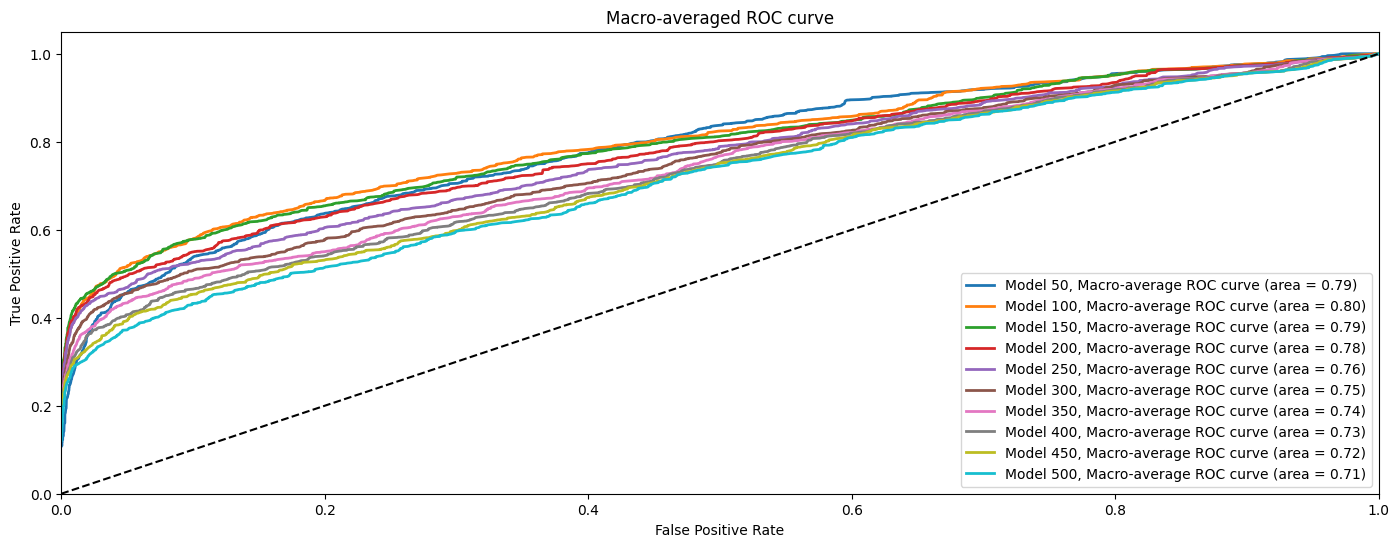

In [ ]:
classes = ['Class '+str(i) for i in range(10)]
plot_multiclass_roc_with_macro_avg(y_test, [nb_pca_proba[i] for i in range(len(nb_pca_proba))], classes, np.arange(50,550,50))

***Since the AUC for GNB trained on PCA with 100 components is higher than the others and has n accuracy greater, we choose this and move forward with it***

The report is produced for specifcity, Here is a graph

Text(0.5, 1.0, 'n_components vs. GaussianNB accuracy')

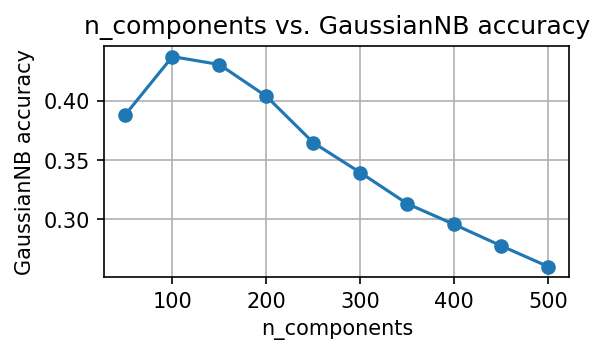

In [ ]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,NB_PCA_Accuracies,marker='o')
plt.xlabel('n_components')
plt.ylabel('GaussianNB accuracy')
plt.title('n_components vs. GaussianNB accuracy')

In [ ]:
pca = PCA(n_components=100)
train_pca = pca.fit_transform(x_train_all)

x_train, x_test, y_train, y_test = train_test_split(train_pca, y_train_all, test_size=0.2, random_state=0)
clf_train_all = GaussianNB()
clf_train_all.fit(x_train,y_train.values.ravel())
y_pred=clf_train_all.predict(x_test)
y_pred_prob_gnb_pca = clf_train_all.predict_proba(x_test)
nb_pca_proba.append(y_pred_prob_gnb_pca)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
print("Accuracy: ", accuracy)

              precision    recall  f1-score   support

           0       0.47      0.56      0.51        43
           1       0.47      0.50      0.49       416
           2       0.68      0.29      0.40       459
           3       0.55      0.35      0.43       284
           4       0.50      0.48      0.49       395
           5       1.00      0.41      0.58        54
           6       0.14      0.79      0.24        84
           7       0.90      0.58      0.70        45
           8       0.65      0.66      0.66       113
           9       0.33      0.42      0.37        45

    accuracy                           0.44      1938
   macro avg       0.57      0.50      0.49      1938
weighted avg       0.55      0.44      0.46      1938

Accuracy:  0.44324045407636736


In [ ]:
# Performing cross-validation with 10 folds
cross_validation = cross_val_score(clf_train_all, x_train, y_train.values.ravel(), cv=10)

# Displaying the results of cross-validation
print("Cross Validation Scores: ", cross_validation )
print("\nCross Validation Mean: ", cross_validation.mean())

Cross Validation Scores:  [0.45231959 0.39304124 0.41806452 0.39354839 0.42580645 0.43096774
 0.4283871  0.42064516 0.45419355 0.40387097]

Cross Validation Mean:  0.422084469571001


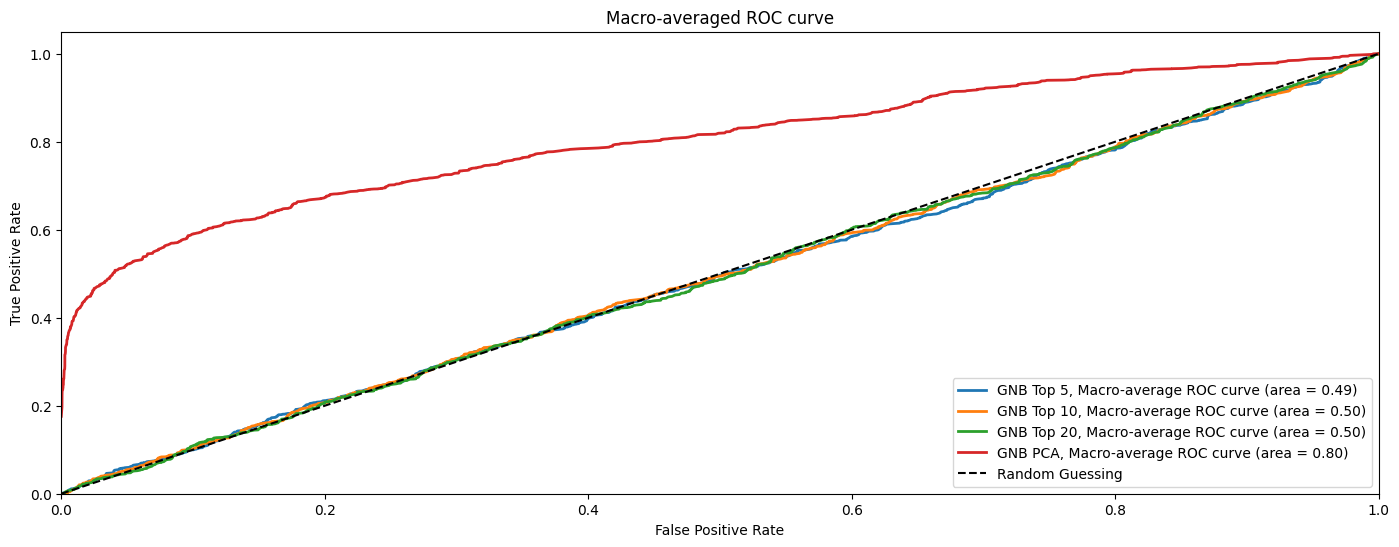

In [ ]:
plot_multiclass_roc_with_macro_avg(y_test, [y_pred_prob_gnb_top5, y_pred_prob_gnb_top10, y_pred_prob_gnb_top20, y_pred_prob_gnb_pca], classes, ["GNB Top 5", "GNB Top 10", "GNB Top 20", "GNB PCA"])

In [ ]:
y_pred_prob_gnb_top5

array([[2.18065514e-11, 4.68059632e-06, 6.26629884e-05, ...,
        1.46525702e-03, 3.10754906e-06, 9.98261143e-01],
       [2.06174664e-23, 1.10158976e-02, 9.88984102e-01, ...,
        5.39415114e-41, 1.25629525e-13, 7.28388462e-84],
       [1.13883754e-02, 3.26635623e-05, 1.23822668e-09, ...,
        9.94251956e-18, 2.90597473e-09, 6.27070497e-03],
       ...,
       [1.72437625e-03, 7.39043018e-01, 2.59228032e-01, ...,
        1.96442377e-14, 1.79923372e-07, 2.09269270e-28],
       [1.59846035e-07, 1.78481804e-05, 3.65347380e-05, ...,
        2.89381866e-06, 6.04033147e-08, 6.51870169e-01],
       [1.05020201e-14, 2.79938408e-09, 2.04886493e-07, ...,
        1.53911150e-04, 1.56266550e-08, 7.98543033e-01]])

In [ ]:
plot_multiclass_roc_with_macro_avg(y_test, [y_pred_prob_gnb_top5], classes, ["GNB Top 5"])




##Running PCA on the datasets with top 5, 10 and 20 features of every class.




### Creating functions to perform PCA on the datasets

In [ ]:
def pca_components(x_train):
  #
  scaler = StandardScaler()
  scaled_train = scaler.fit_transform(x_train)
  var_ratio = []
  nums = range(5,len(x_train.columns),5)

  for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scaled_train)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

  plt.figure(figsize=(4,2),dpi=150)
  plt.grid()
  plt.plot(nums,var_ratio,marker='o')
  plt.xlabel('n_components')
  plt.ylabel('Explained variance ratio')
  plt.title('n_components vs. Explained Variance Ratio')

In [ ]:
def gaussian_pca_topN(x_train, components):
  NB_PCA_Accuracies = []
  pca = PCA(n_components=components)
  train_pca = pca.fit_transform(x_train)
  X_train, x_test, y_train, y_test = train_test_split(train_pca, y_train_all, test_size=0.2, random_state=0)

  clf_train_all = GaussianNB()
  clf_train_all.fit(X_train,y_train.values.ravel())
  y_pred=clf_train_all.predict(x_test)
  y_pred_proba_top_n = clf_train_all.predict_proba(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  NB_PCA_Accuracies.append(accuracy)
  print(classification_report(y_test,y_pred))
  print("Accuracy: ", accuracy)
  return y_pred_proba_top_n

### PCA on dataset with top 5 features for every class

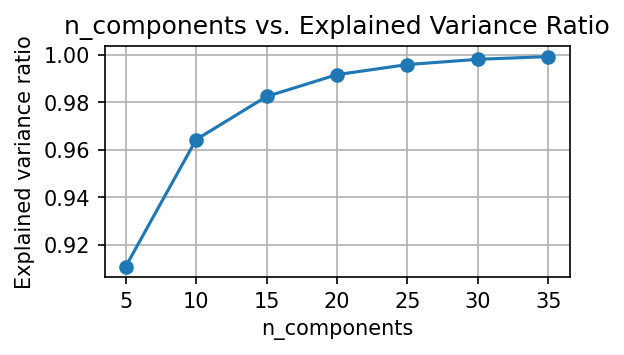

In [ ]:
pca_components(x_train_top5)

Here, we see that the rate of increase in explained covariance ratio slows down around 15. Hence we choose 15 components


In [ ]:
y_pred_prob_top_5 = gaussian_pca_topN(x_train_top5, 15)

              precision    recall  f1-score   support

           0       0.49      0.58      0.53        43
           1       0.70      0.54      0.61       416
           2       0.73      0.51      0.60       459
           3       0.40      0.80      0.54       284
           4       0.57      0.45      0.50       395
           5       0.44      0.39      0.41        54
           6       0.37      0.57      0.45        84
           7       0.73      0.49      0.59        45
           8       0.69      0.69      0.69       113
           9       0.45      0.49      0.47        45

    accuracy                           0.56      1938
   macro avg       0.56      0.55      0.54      1938
weighted avg       0.60      0.56      0.56      1938

Accuracy:  0.5562435500515995


###PCA on dataset with top 10 features for every class



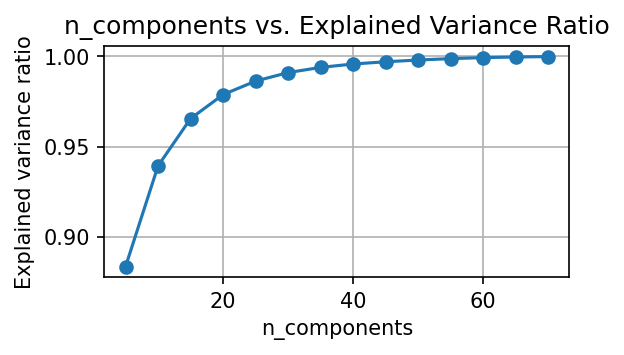

In [ ]:
pca_components(x_train_top10)

Here, we see that the rate of increase in explained covariance ratio slows down around 15. Hence we choose 15 components for PCA.


In [ ]:
y_pred_prob_top_10 = gaussian_pca_topN(x_train_top10, 15)

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        43
           1       0.72      0.58      0.64       416
           2       0.72      0.53      0.61       459
           3       0.42      0.80      0.55       284
           4       0.65      0.56      0.60       395
           5       0.67      0.54      0.60        54
           6       0.39      0.48      0.43        84
           7       0.83      0.56      0.67        45
           8       0.61      0.66      0.64       113
           9       0.61      0.60      0.61        45

    accuracy                           0.60      1938
   macro avg       0.63      0.59      0.59      1938
weighted avg       0.64      0.60      0.60      1938

Accuracy:  0.5959752321981424


###PCA on dataset with top 20 features for every class

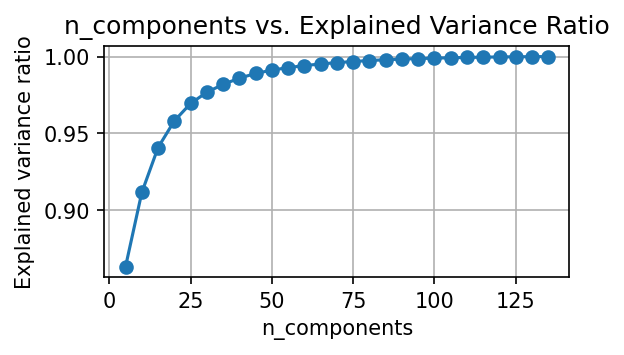

In [ ]:
pca_components(x_train_top20)

Here, we see that the rate of increase in explained covariance ratio slows down around 20. Hence we choose 20 components for PCA.

In [ ]:
y_pred_prob_top_20 = gaussian_pca_topN(x_train_top20, 20)

              precision    recall  f1-score   support

           0       0.57      0.65      0.61        43
           1       0.70      0.57      0.63       416
           2       0.71      0.52      0.60       459
           3       0.37      0.79      0.51       284
           4       0.63      0.45      0.53       395
           5       0.80      0.52      0.63        54
           6       0.45      0.54      0.49        84
           7       0.83      0.56      0.67        45
           8       0.66      0.66      0.66       113
           9       0.52      0.53      0.53        45

    accuracy                           0.57      1938
   macro avg       0.63      0.58      0.58      1938
weighted avg       0.63      0.57      0.58      1938

Accuracy:  0.5701754385964912


###Using an ROC curve to visualize the above models and seek the best out and get a better evaluate them

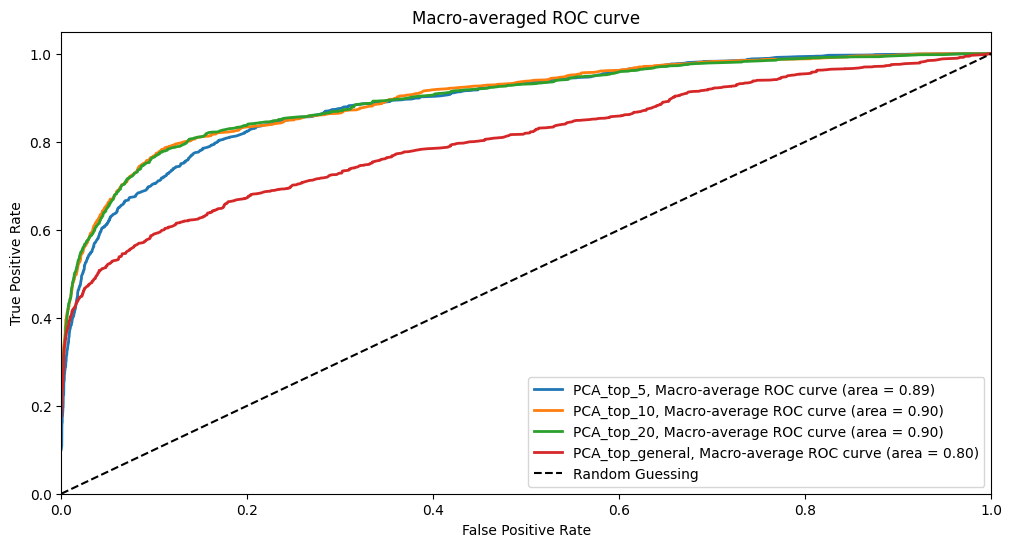

In [ ]:
plot_multiclass_roc_with_macro_avg(y_test, [y_pred_prob_top_5, y_pred_prob_top_10, y_pred_prob_top_20, y_pred_prob_gnb_pca], classes, ["PCA_top_5", "PCA_top_10", "PCA_top_20", "PCA_top_general"], figsize=(12,6))

## Conclusion

The dataset is imbalanced, which might either reflect real-world scenarios where certain signs are more common, or it could indicate uneven data collection.

Through data exploration, we identified class imbalances and high contrast in our image dataset. Among classifiers, the Multinomial Naive Bayes model was superior, though the GaussianNB showed potential in ROC curve dynamics. Using KNN, we pinpointed an optimal neighbour count for best performance. Furthermore, selecting top correlating features boosted the Gaussian Naive Bayes accuracy, therefore highlighting the importance of targeted feature selection. However, similar ROC curves across models indicated challenges tied to class imbalance.
